In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

import torch.optim as optim
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from  statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.metrics import mean_squared_error as mse

d:\anaconda\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4232
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 18
[LightGBM] [Info] Start training from score 0.183204


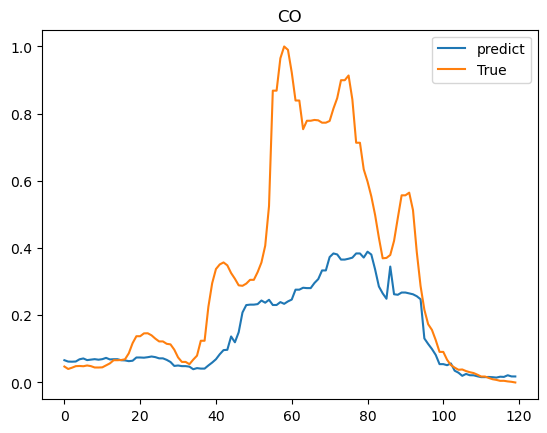

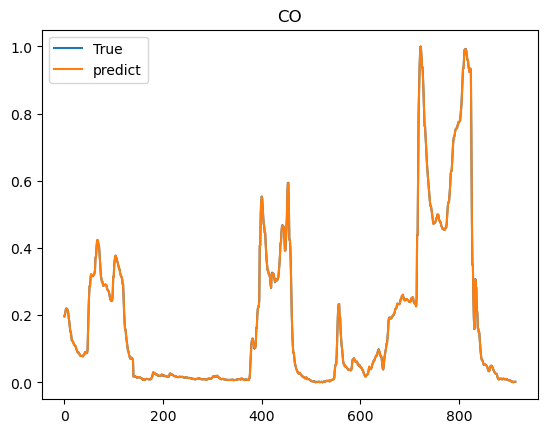

In [177]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data = pd.read_excel("data/0414algorithmall.xlsx")
test = data.iloc[[i for i in range(140,260)],:]
train = data.iloc[[not i for i in data.index.isin([i for i in range(140,260)])],:]
train=train.sample(frac=1.0)
X=train.iloc[:,[i for i in range(18)]]
X=(X.join(X["温度"].rename(17))).drop(columns="温度",axis=1)
X=(X.join(X["湿度"].rename(18))).drop(columns="湿度",axis=1)
y=train.iloc[:,18:]
y=sc.fit_transform(y)
lgbmr_model = LGBMRegressor(
        colsample_bytree=0.7,
        learning_rate=0.01,
        min_child_samples=10,
        num_leaves=19,
        objective='regression',
        n_estimators=1000,
        n_jobs=4,
        random_state=337)
# c,y_no2 = hpfilter(y["CO"])
# lgbmr_model.fit(X,y_no2)
lgbmr_model.fit(X,[i[3] for i in y])
X_1=test.iloc[:,[i for i in range(18)]]
X_1=(X_1.join(X_1["温度"].rename(17))).drop(columns="温度",axis=1)
X_1=(X_1.join(X_1["湿度"].rename(18))).drop(columns="湿度",axis=1)
y_1=test.iloc[:,18:]
plt.plot(lgbmr_model.predict(X_1),label="predict")
plt.plot([i[3]for i in sc.fit_transform(y_1)],label="True")
plt.title("CO")
plt.legend()
plt.subplots()
train = data.iloc[[not i for i in data.index.isin([i for i in range(140,260)])],:]
X=train.iloc[:,[i for i in range(18)]]
X=(X.join(X["温度"].rename(17))).drop(columns="温度",axis=1)
X=(X.join(X["湿度"].rename(18))).drop(columns="湿度",axis=1)
y=train.iloc[:,18:]
plt.plot([i[3]for i in sc.fit_transform(y)],label="True")
plt.plot(lgbmr_model.predict(X),label="predict")
plt.title("CO")
plt.legend()

In [225]:
data = pd.read_excel("data/0414algorithmall.xlsx")
X=data.iloc[:,[i for i in range(18)]]
X=(X.join(X["温度"].rename(17))).drop(columns="温度",axis=1)
X=(X.join(X["湿度"].rename(18))).drop(columns="湿度",axis=1)
y=data.iloc[:,18:]
y=sc.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)


RandomForestRegressor()

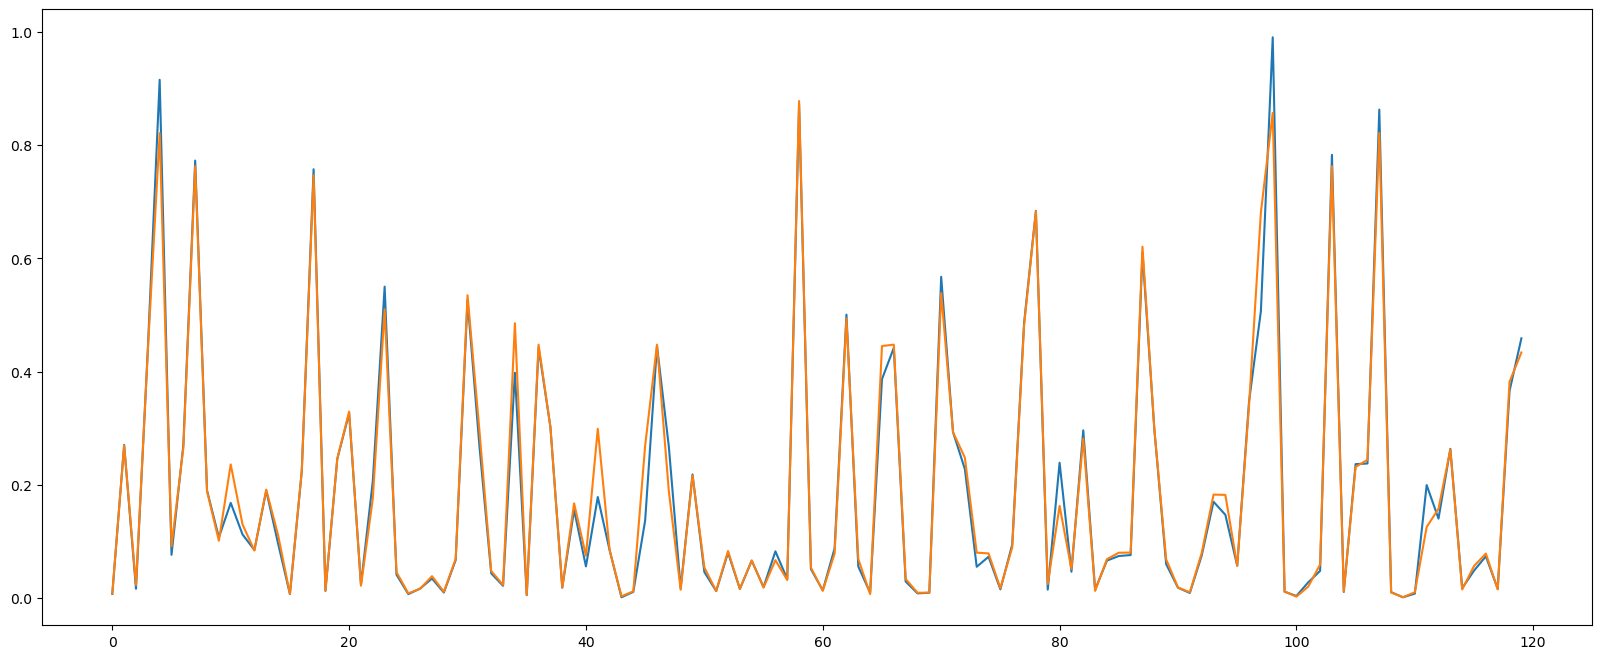

In [228]:
plt.subplots(figsize=(20,8))
plt.plot([i[3] for i in y_test][:120],label="True")
plt.plot([i[3] for i in rfr_model.predict(x_test)][:120],label="predicts")

In [229]:
data = pd.read_excel("data/0414algorithmall.xlsx")
test = data.iloc[[i for i in range(140,260)],:]
train = data.iloc[[not i for i in data.index.isin([i for i in range(140,260)])],:]
X=test.iloc[:,[i for i in range(18)]]
X=(X.join(X["温度"].rename(17))).drop(columns="温度",axis=1)
X=(X.join(X["湿度"].rename(18))).drop(columns="湿度",axis=1)
y=test.iloc[:,18:]
y= sc.fit_transform(y)

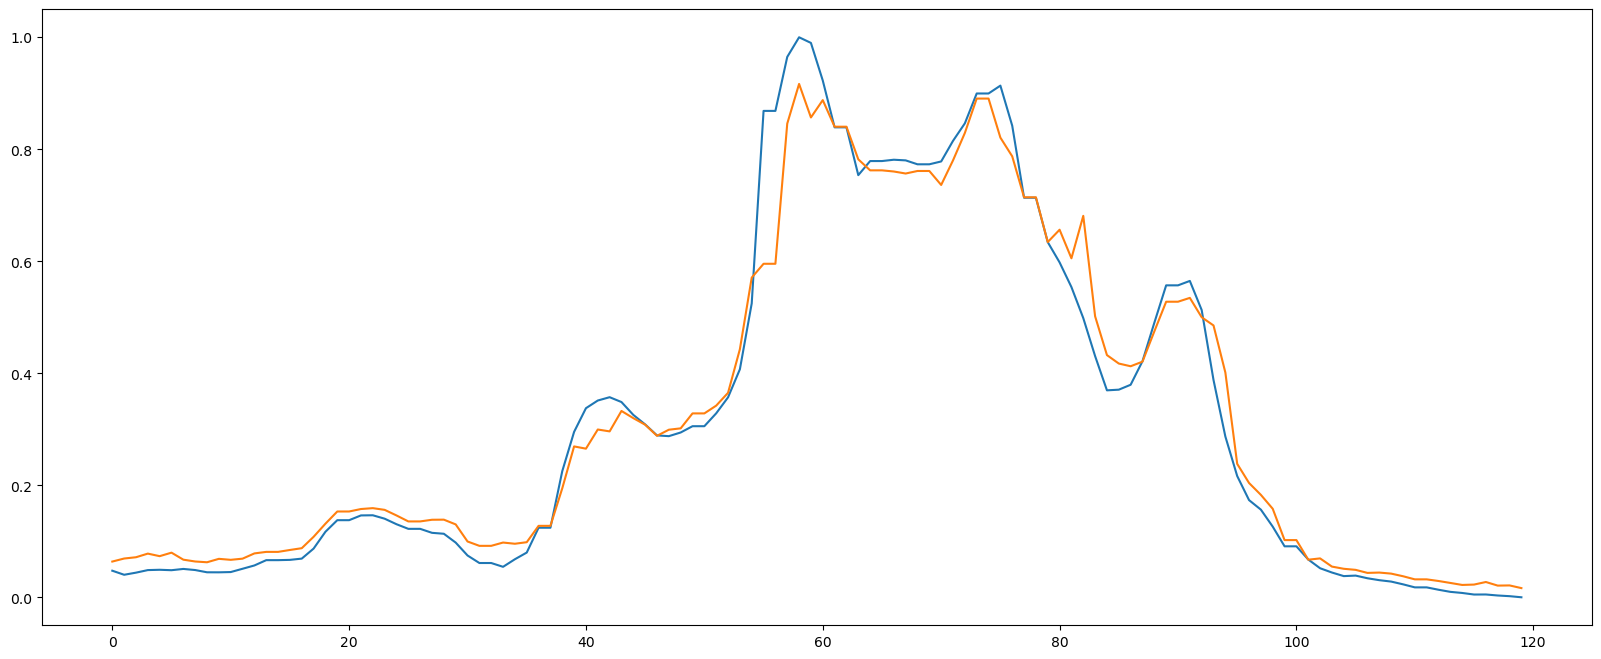

In [230]:
plt.subplots(figsize=(20,8))
plt.plot([i[3] for i in y],label="True")
plt.plot([i[3] for i in rfr_model.predict(X)],label="predicts")

In [ ]:
plt.subplots(figsize=(20,8))
plt.plot([i[3] for i in train][:120],label="True")
plt.plot([i[3] for i in rfr_model.predict(x_test)][:120],label="predicts")

In [ ]:
loss=[]
predicts = pd.DataFrame([],columns=["TVOC_predicts","NO2_predicts","SO2_predicts","CO_predicts"])
for j in range(y.shape[1]):
    loss.append(mse([i[j] for i in rfr_model.predict(X)],[i[j] for i in y]))
    predicts.iloc[:,j]=[i[j] for i in sc.inverse_transform(rfr_model.predict(X))]
df =  pd.concat([pd.read_excel("data/0414algorithmall.xlsx"),predicts],axis=1)
df.to_csv("predicts.csv")

EDA and feature engineering

In [237]:
data.iloc[:,[i for i in range(16)]].describe().values[2]

array([0.09962053, 0.05700459, 0.12189886, 0.02467815, 0.11693493,
       0.07257197, 0.06232363, 0.27496096, 0.06209966, 0.07708452,
       0.26547216, 0.46037067, 0.12380598, 0.72065527, 0.05204576,
       0.09350382])

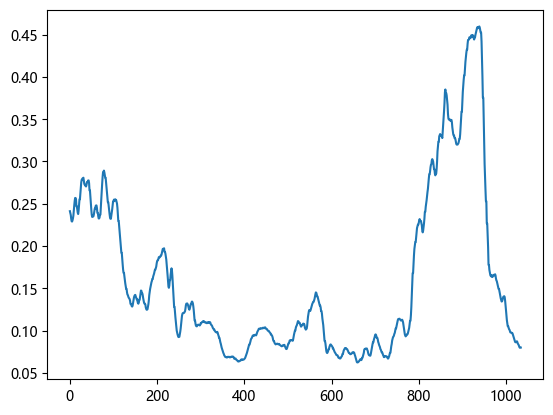

In [306]:
plt.plot(data.iloc[:,0])

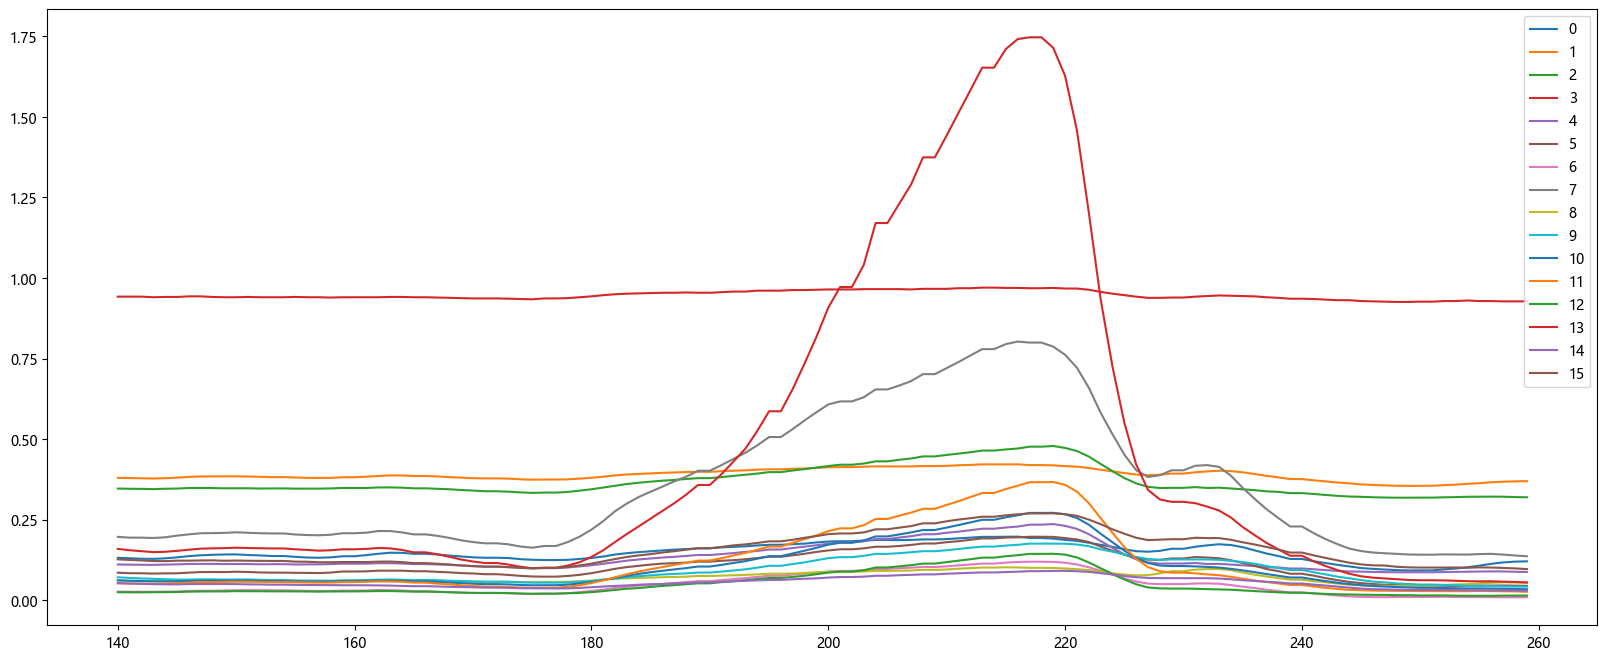

In [586]:
plt.figure(figsize=(20,8))
for i in range(16):
    plt.plot(data.iloc[[j for j in range(140,260)],i],label=i)
plt.legend()
plt.show()

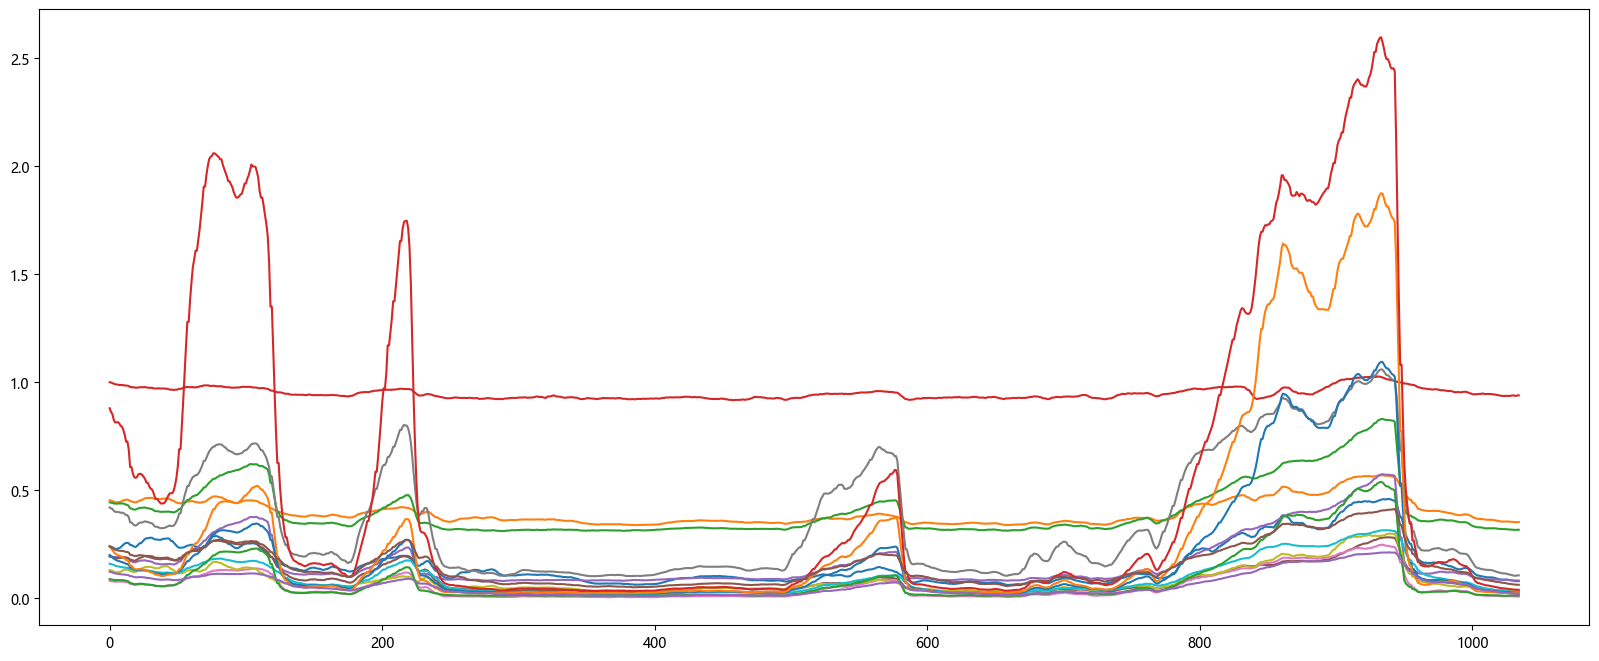

In [349]:
plt.figure(figsize=(20,8))
for i in range(16):
    plt.plot(data.iloc[:,i],label=i)
plt.show()

d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

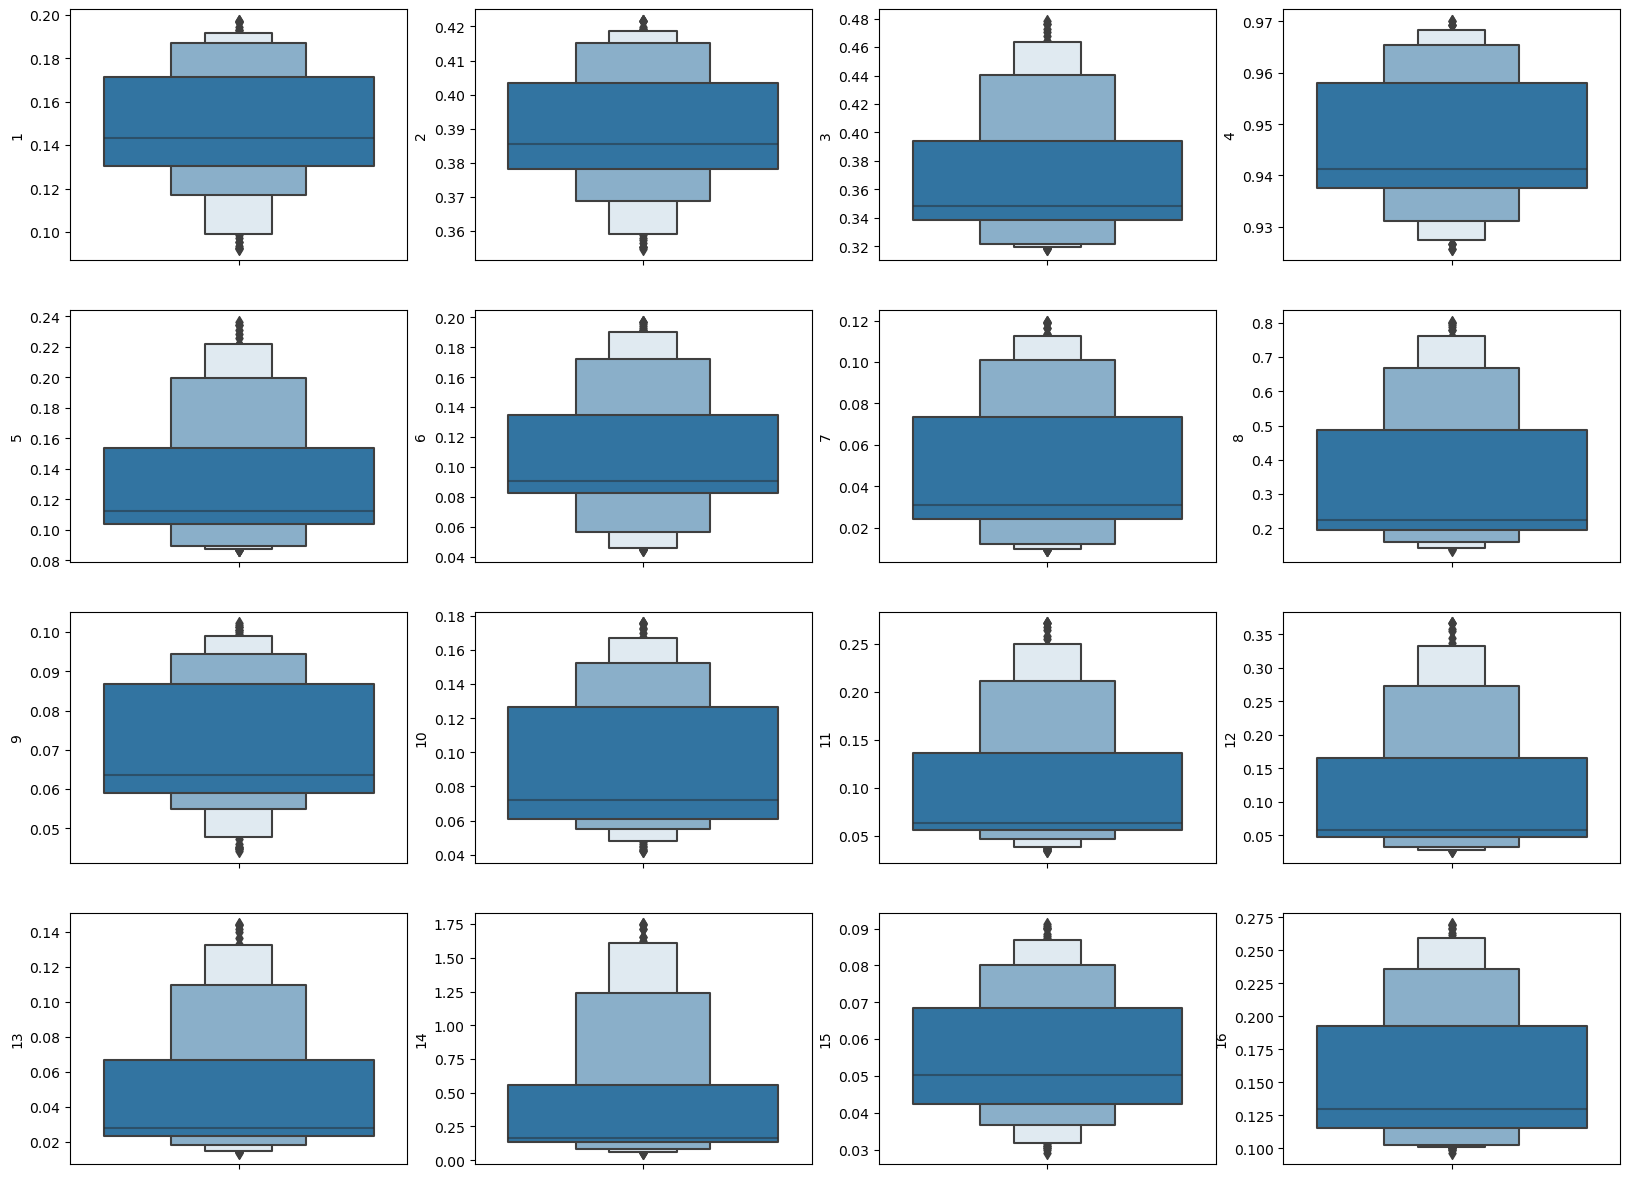

In [249]:
plt.figure(figsize=(20,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxenplot(y=data.iloc[[j for j in range(140,260)],i])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

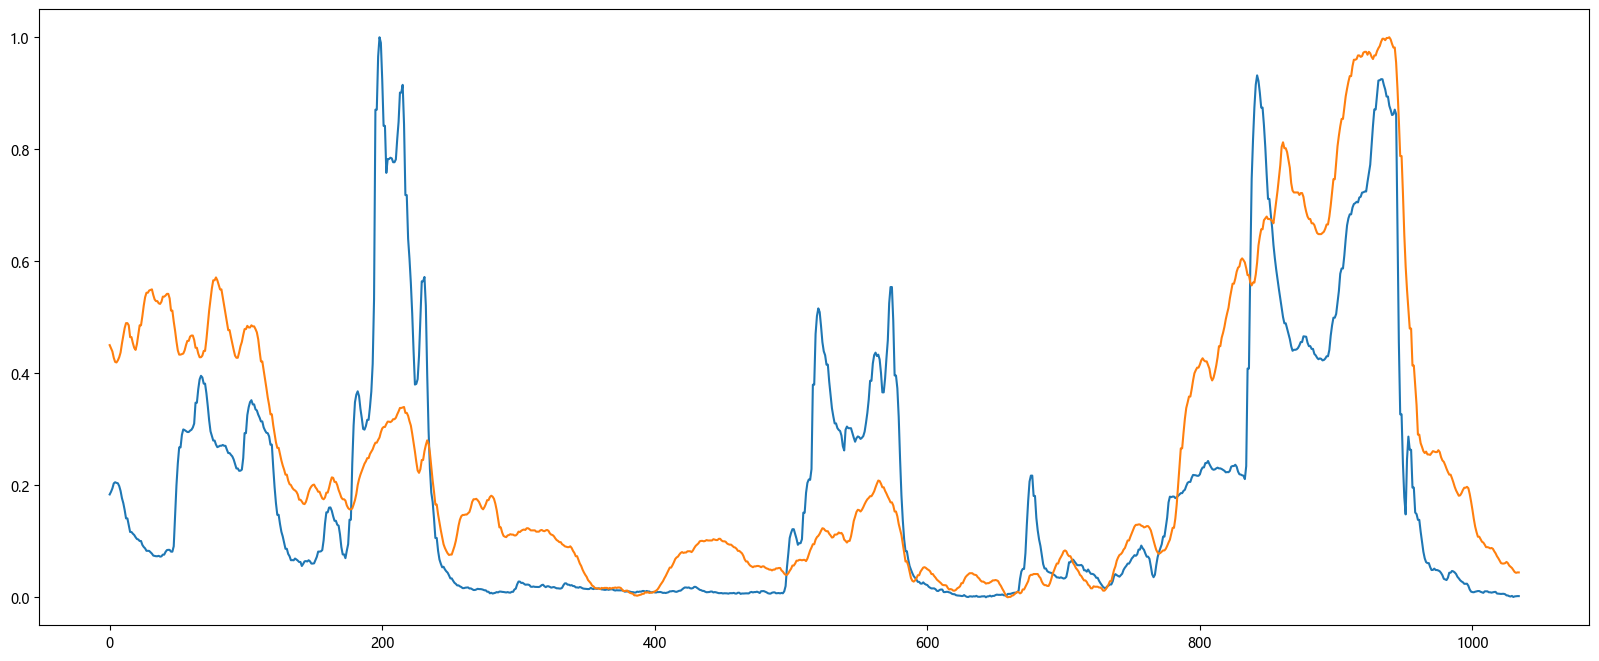

In [687]:
plt.figure(figsize=(20,8))
plt.plot(sc.fit_transform(np.array(data.CO[0:]).reshape(-1, 1)),label="CO")
plt.plot(sc.fit_transform(np.array(data.iloc[:,0])[0:].reshape(-1, 1)),label="data14")
# plt.plot(sc.fit_transform(np.array(data.温度[140:260]).reshape(-1, 1)),label="温度")
# plt.plot(sc.fit_transform(np.array(data.湿度[140:260]).reshape(-1, 1)),label="湿度")

plt.show()


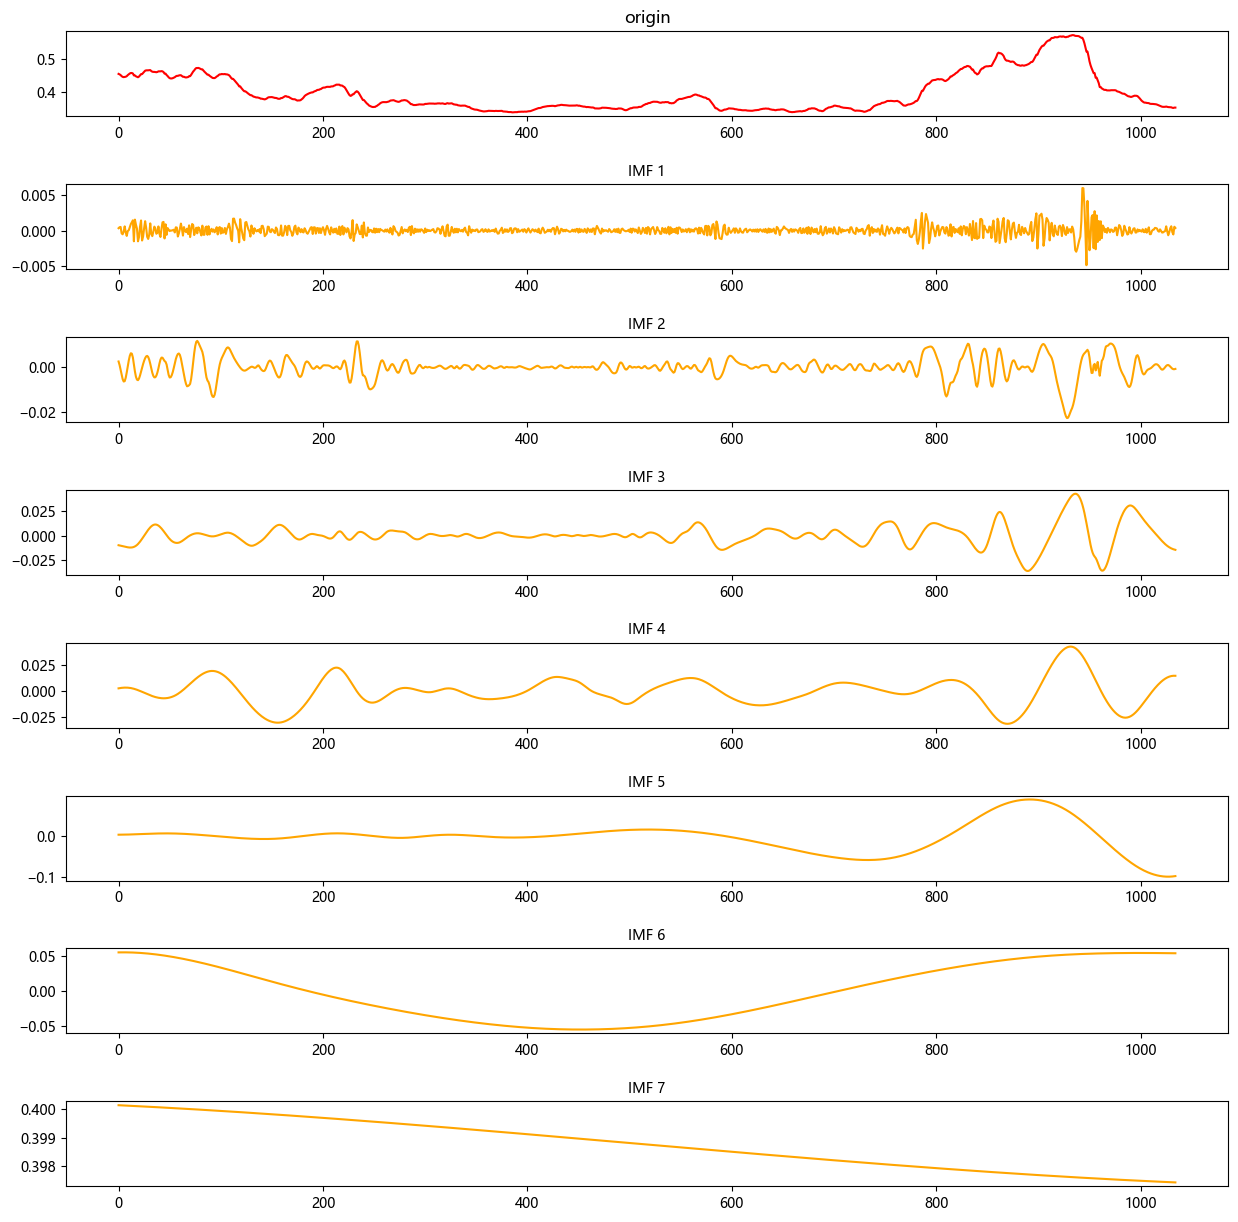

In [688]:
from PyEMD import EMD

plt.rc("font", family='Microsoft YaHei')
# 创建 EMD 对象
emd = EMD()
# 对信号进行经验模态分解
codata = np.array(data.iloc[:,1].tolist())
IMFs = emd(codata)

# 可视化
plt.figure(figsize=(15,15))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(codata, 'r')
plt.title("origin")

for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(imf, color='orange')
    plt.title("IMF "+str(num+1), fontsize=10)
# 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.show()

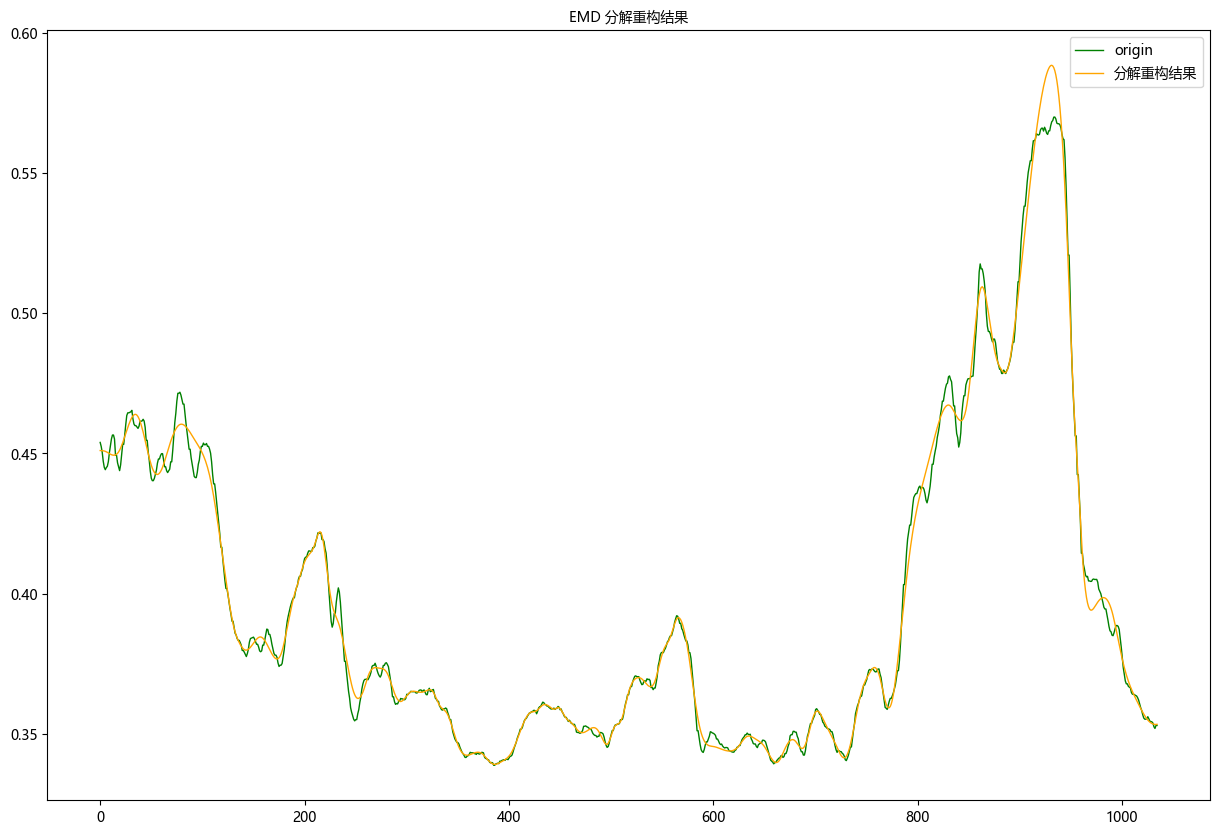

In [693]:
reconstructed_data = np.sum(IMFs[2:], 0) # 沿ｙ轴方向求和

plt.figure(figsize=(15,10))
plt.plot(codata, linewidth=1, color='green', label='origin')
plt.plot(reconstructed_data, linewidth=1, color='orange', label='分解重构结果')
plt.title("EMD 分解重构结果", fontsize=10, loc='center')
plt.xticks(fontsize=10) # x 轴刻度字体大小
plt.yticks(fontsize=10) # y 轴刻度字体大小
plt.legend(loc='upper right') # 绘制曲线图例，信息来自类型 label
plt.show()

In [393]:
from  statsmodels.tsa.filters.hp_filter import hpfilter
cycle,detrended_series_5 = hpfilter(data.CO,10)

In [385]:
from statsmodels.tsa.seasonal import STL
stl_result = STL(data.CO, seasonal=13,period=2).fit()
detrended_series_2 = stl_result.resid

In [671]:
data_serise = pd.DataFrame(IMFs[:5].transpose())
x_train,x_test,y_train,y_test = train_test_split(data_serise,data.iloc[:,18:],test_size=0.1,random_state=432)

In [672]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'SO2')

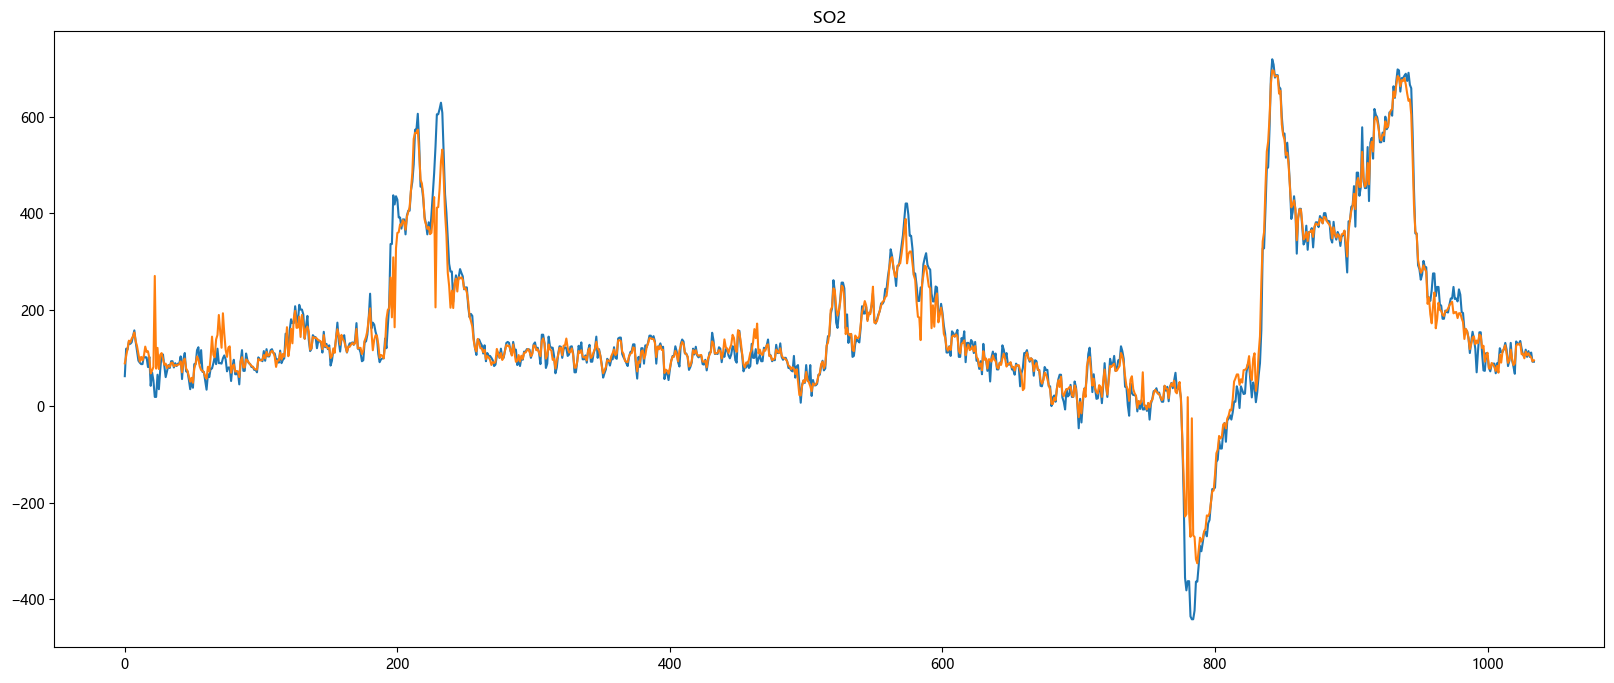

In [680]:
plt.subplots(figsize=(20,8))
plt.plot(list(data.SO2))
plt.plot([i[2] for i in rfr_model.predict(data_serise)],label="predicts")
plt.title("SO2")

In [679]:
pd.DataFrame(rfr_model.predict(data_serise),columns=data.iloc[:,18:].columns.values).to_csv("predicts.csv")

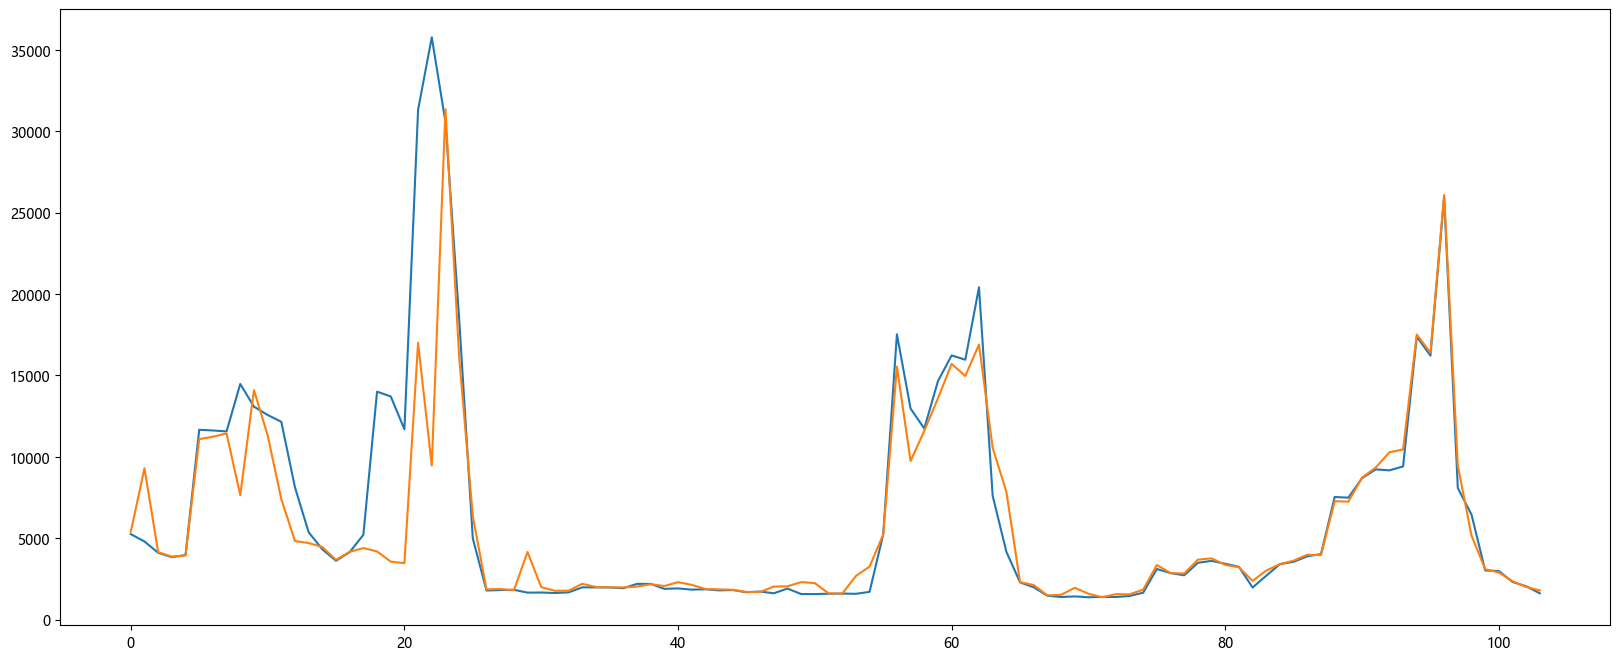

In [640]:
plt.subplots(figsize=(20,8))
plt.plot(np.array(list(y_test.sort_index())))
plt.plot(rfr_model.predict(x_test.sort_index()),label="predicts")


In [574]:
data_serise = data.iloc[:,[0,16,17]]

In [694]:
# data_serise = pd.DataFrame(IMFs.transpose())
data_serise = data.iloc[:,[0,16,17]]
data_serise.columns = [i for i in range(3)]
test = data_serise[140:260]

train = pd.concat([data_serise[:140],data_serise[260:]])

sc= MinMaxScaler()
y=data.iloc[[not i for i in data.index.isin([i for i in range(140,260)])],21]
# y=data.iloc[:700,21]
y= sc.fit_transform(np.array(y).reshape(-1, 1))
train["y"] = y
train=train.sample(frac=1.0)

In [695]:
rfr_model = RandomForestRegressor()
rfr_model.fit(train.iloc[:,:3],train["y"])

RandomForestRegressor()

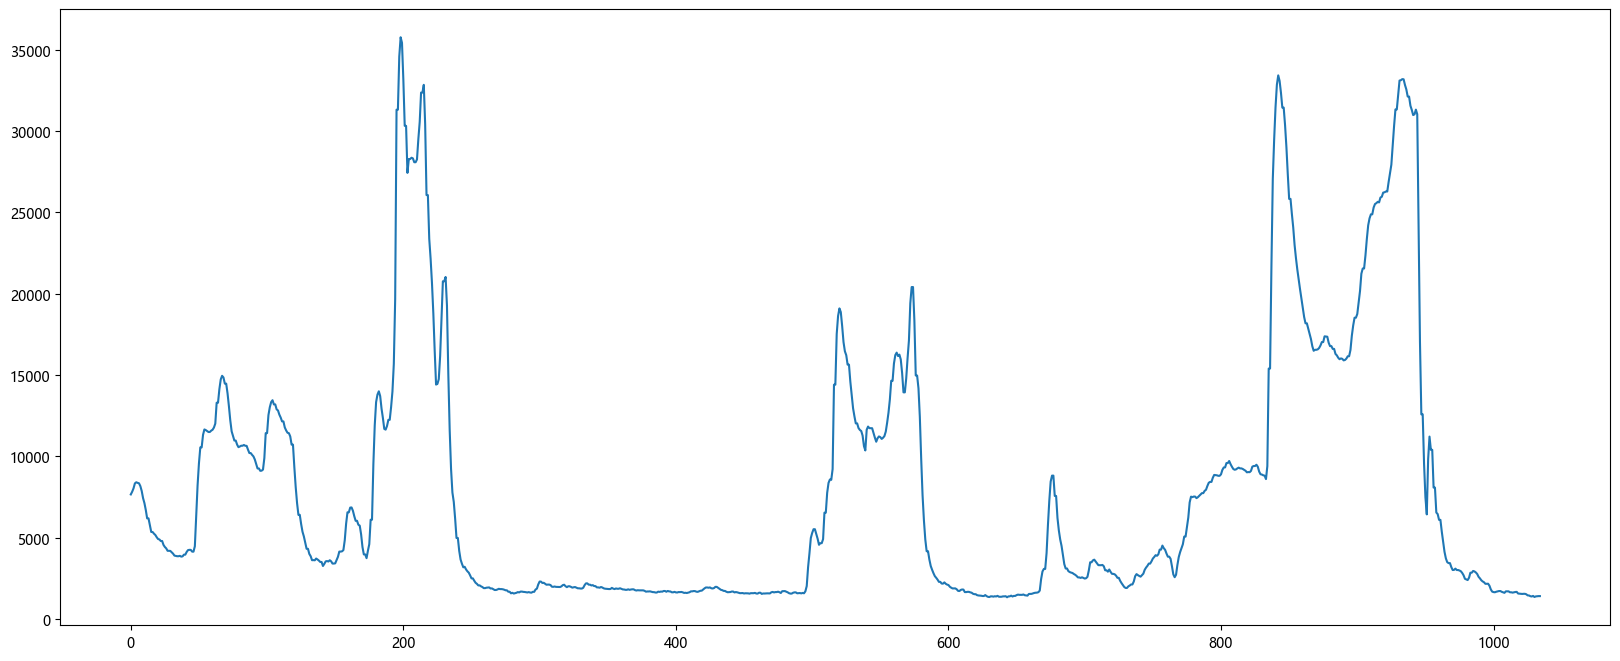

In [588]:
plt.subplots(figsize=(20,8))
plt.plot(data.CO)

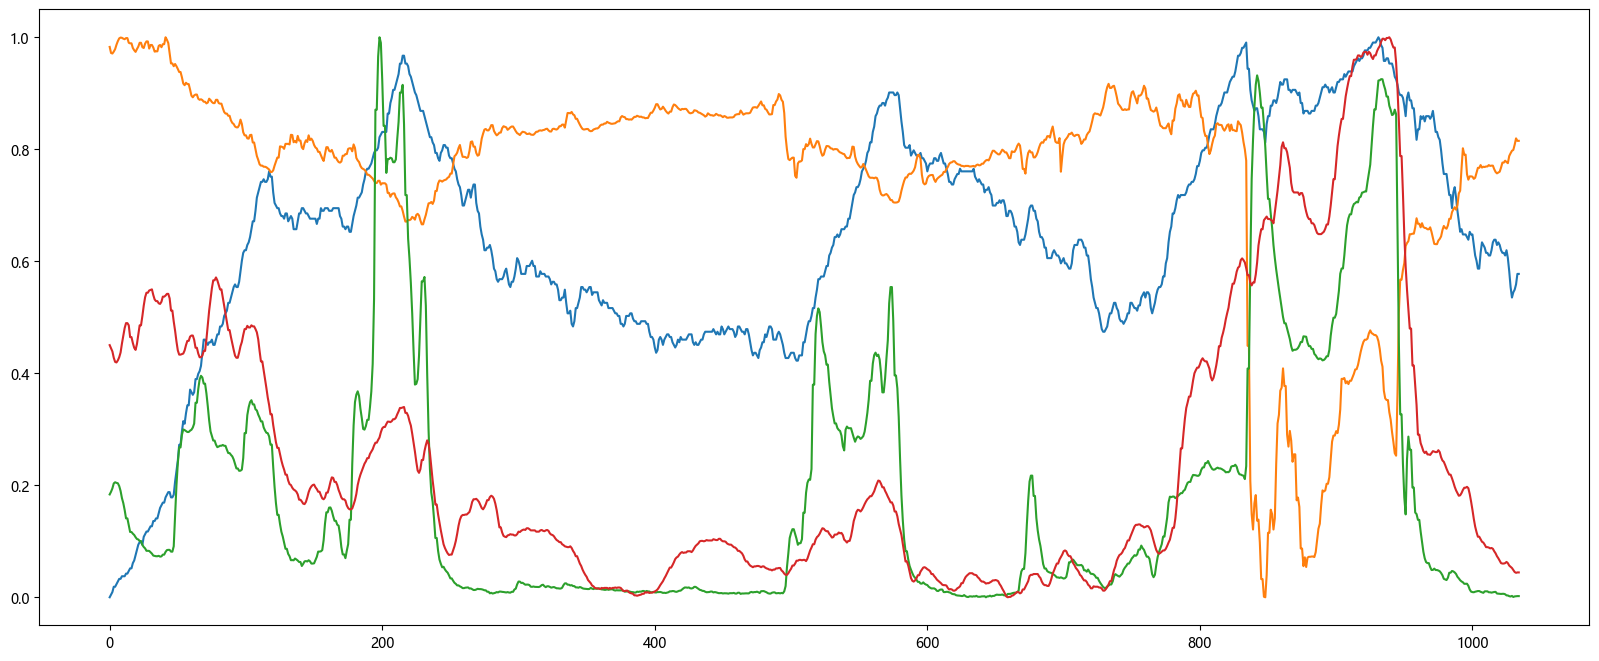

In [650]:
plt.subplots(figsize=(20,8))
plt.plot(sc.fit_transform(np.array(data.温度).reshape(-1, 1)))
plt.plot(sc.fit_transform(np.array(data.湿度).reshape(-1, 1)))
plt.plot(sc.fit_transform(np.array(data.CO).reshape(-1, 1)))
plt.plot(sc.fit_transform(np.array(data.iloc[:,0]).reshape(-1, 1)))

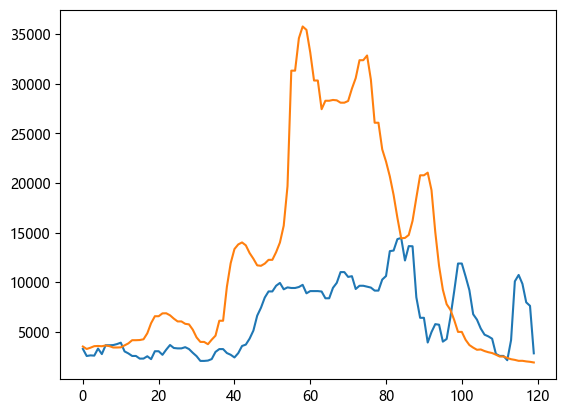

In [696]:

plt.plot(sc.inverse_transform(rfr_model.predict(test).reshape(-1, 1)))
plt.plot(np.array(data.CO[140:260]))

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [321]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


In [322]:
adfuller_test(data.iloc[:,13], name=14)

    Augmented Dickey-Fuller Test on "14" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7936
 No. Lags Chosen       = 14
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0592. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [357]:
data_serise=data.iloc[:,13].diff()

In [ ]:
adfuller_test(data_serise, name=14)

In [359]:
np.array(data.CO).reshape(-1)

array([7665, 7831, 8040, ..., 1409, 1415, 1415], dtype=int64)

In [364]:
data_serise[0]=0

In [356]:
data_serise.__len__()

1034

In [365]:
np.column_stack((data_serise,np.array(data.CO)))

array([[ 0.0000e+00,  7.6650e+03],
       [-1.7096e-02,  7.8310e+03],
       [-1.0110e-02,  8.0400e+03],
       ...,
       [-2.6420e-04,  1.4090e+03],
       [-5.2800e-04,  1.4150e+03],
       [ 0.0000e+00,  1.4150e+03]])

In [366]:
model = VAR(np.column_stack((data_serise,np.array(data.CO))))
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')


Lag Order = 1
AIC :  5.858487641405199
BIC :  5.887159924123198
FPE :  350.1941356411725
HQIC:  5.869367408184623 

Lag Order = 2
AIC :  5.564072020812844
BIC :  5.611896052459694
FPE :  260.88303679979646
HQIC:  5.5822198200398345 

Lag Order = 3
AIC :  5.501508465273876
BIC :  5.5685138482628105
FPE :  245.06142205306534
HQIC:  5.526936216735845 

Lag Order = 4
AIC :  5.503886066390165
BIC :  5.590102478332265
FPE :  245.6448892429991
HQIC:  5.536605720951219 

Lag Order = 5
AIC :  5.471175929247747
BIC :  5.576633123215631
FPE :  237.73997952531258
HQIC:  5.511199468959266 

Lag Order = 6
AIC :  5.455967382766699
BIC :  5.580695187559396
FPE :  234.15190504578703
HQIC:  5.503306820978418 

Lag Order = 7
AIC :  5.441323091348188
BIC :  5.585351411757189
FPE :  230.7482372416135
HQIC:  5.4959904728197815 

Lag Order = 8
AIC :  5.422142052585393
BIC :  5.585500869661898
FPE :  226.36485519829748
HQIC:  5.484149453598553 

Lag Order = 9
AIC :  5.402012689569929
BIC :  5.584732060893288


In [367]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,11.48,11.49,9.707e+04,11.49
1,5.877,5.905,356.6,5.888
2,5.581,5.630,265.4,5.600
3,5.517,5.584*,248.9,5.542
4,5.518,5.605,249.2,5.551
5,5.484,5.590,240.7,5.524
6,5.467,5.592,236.7,5.514
7,5.450,5.595,232.8,5.505
8,5.429,5.593,228.0,5.492
9,5.407,5.591,223.1,5.477*


In [369]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Jul, 2024
Time:                     10:46:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.58473
Nobs:                     1026.00    HQIC:                   5.47137
Log likelihood:          -5644.89    FPE:                    221.854
AIC:                      5.40201    Det(Omega_mle):         213.860
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001821         0.001012            1.799           0.072
L1.y1         0.653958         0.033602           19.462           0.000
L1.y2        -0.000002         0.000001           -2.212           0.027
L2.y1         0.158334

In [371]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = data_serise.values[-lag_order:]
forecast_input


9


array([-0.0005329, -0.0013297, -0.0005309, -0.0007954, -0.0005296,
       -0.0007934, -0.0002642, -0.000528 ,  0.       ])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=1)
df_forecast = pd.DataFrame(fc, index=df.index[-1:], columns=df.columns + '_2d')
df_forecast


In [1]:
import pandas as pd

In [95]:
data = pd.read_csv("data/12-26 16-42-12 Cal.txt",sep=r'\s+',names=[str(i) for i in range(2500)])
data=data.transpose()

In [2]:
data = pd.read_csv("data/12-26 16-42-12 Cal.txt",sep=r'\s+',names=[str(i) for i in range(2500)])
data=data.transpose()
data=data.iloc[1:,:]
data=data.dropna(how="all",axis=0)
data = data[data.sum(axis=1) != 0]
names= ["0","10","5","2","1"]
data = data.iloc[:52,:]
data=data.drop(labels=["25","26","27","28"],axis=0)

In [93]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,58.8403,10.06860,14.45370,23.27380,30.35470,62.2399,9.04231,14.74920,24.24750,35.66330,64.6084,5.50341,7.87086,14.12250,20.72770
2,55.0159,9.63567,12.97250,20.25110,26.80140,60.4991,8.37595,12.28510,20.00730,30.67530,65.1560,6.15142,8.35125,13.37900,18.94700
3,70.3137,11.82210,16.51130,26.15180,34.32900,79.6280,9.60747,15.09800,25.31030,38.70390,81.8386,6.22178,8.70320,14.85440,21.77660
4,95.5670,14.60060,19.96340,33.48200,45.80380,99.5187,13.80010,22.07520,37.29790,56.17120,101.9130,7.02411,10.09810,17.45310,26.53880
5,27.0009,5.03119,6.72519,10.60360,13.99530,28.7879,4.63380,6.88376,10.94070,16.13910,30.5143,3.11559,4.27178,6.78689,9.58871
6,28.0669,6.98176,9.40313,14.05170,17.30670,29.4225,4.70208,7.10230,11.31110,17.14380,33.6209,3.96999,5.64553,9.17603,12.69250
7,54.1002,9.72075,13.27270,21.07740,27.40640,58.7248,7.44463,11.97420,20.82020,31.58380,61.9859,4.64426,6.84211,12.05710,17.94000
8,41.9797,6.54949,9.13125,15.37790,20.75080,43.6126,6.00000,9.77789,17.03630,25.24960,44.8327,3.11140,4.56097,8.21254,12.69250
9,34.0904,5.32934,7.15243,11.38900,15.23720,35.5617,4.85673,7.10230,11.68340,18.15120,37.5174,3.22143,4.36185,7.10944,10.20720
10,27.4748,4.88913,6.68432,10.57260,13.75870,28.1733,3.88475,5.75385,9.45843,14.52690,29.7670,2.74028,3.77733,6.29924,9.07778


In [3]:
isb = data.iloc[:,[i for i in range(5)]]
eth = data.iloc[:,[i for i in range(5,10)]]
ac  = data.iloc[:,[i for i in range(10,15)]]
isb.columns,eth.columns,ac.columns = names,names,names

In [4]:
isb["tag"]=0
eth["tag"]=1
ac["tag"] =2 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\165355524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isb["tag"]=0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\165355524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth["tag"]=1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\165355524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [94]:
isb

,0,10,5,2,1,tag
1,58.8403,10.06860,14.45370,23.27380,30.35470,0
2,55.0159,9.63567,12.97250,20.25110,26.80140,0
3,70.3137,11.82210,16.51130,26.15180,34.32900,0
4,95.5670,14.60060,19.96340,33.48200,45.80380,0
5,27.0009,5.03119,6.72519,10.60360,13.99530,0
6,28.0669,6.98176,9.40313,14.05170,17.30670,0
7,54.1002,9.72075,13.27270,21.07740,27.40640,0
8,41.9797,6.54949,9.13125,15.37790,20.75080,0
9,34.0904,5.32934,7.15243,11.38900,15.23720,0
10,27.4748,4.88913,6.68432,10.57260,13.75870,0


In [5]:
cilp_d=pd.concat([isb,eth,ac],axis=0)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cilp_d.iloc[:,:-1], cilp_d.iloc[:,-1], random_state=0)

svc = SVC()                                         
svc.fit(X_train, y_train) 


SVC()

In [73]:
cilp_d

,0,10,5,2,1,tag
1,58.840300,10.068600,14.453700,23.273800,30.354700,0
2,55.015900,9.635670,12.972500,20.251100,26.801400,0
3,70.313700,11.822100,16.511300,26.151800,34.329000,0
4,95.567000,14.600600,19.963400,33.482000,45.803800,0
5,27.000900,5.031190,6.725190,10.603600,13.995300,0
...,...,...,...,...,...,...
76,9.095570,8.780380,8.954190,9.086670,9.212010,2
77,0.004885,0.004885,0.002442,0.004885,0.004885,2
78,32.980100,3.023850,4.085280,6.549490,9.357280,2
79,56.385700,4.787000,6.677520,11.467500,16.736300,2


In [65]:
print(svc.score(X_train, y_train))
print(svc.score(X_test,y_test))

0.6419753086419753
0.5555555555555556


In [70]:
min_on_training = X_train.min(axis=0)                               #计算训练集中每个特征的最小值

range_on_training = (X_train - min_on_training).max(axis=0)           #计算训练集中每个特征的范围(最大值-最小值)

#减去最小值，然后除以范围，这样数据集的每个特征都会在0~1之间
X_train_scaled = (X_train - min_on_training)/range_on_training
X_test_scaled = (X_test - min_on_training)/range_on_training                #利用训练集的最小值和范围对数据集做相同的变换



In [88]:
svc = SVC()                                         #定义SVC支持向量机分类器
svc.fit(X_train_scaled, y_train)                    #训练进行缩放后的数据集

print(svc.score(X_train_scaled, y_train))                  #输出预测的训练集与测试集评分
print(svc.score(X_test_scaled, y_test))


0.7962962962962963
0.8148148148148148


In [90]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.364 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.364 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.394 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.364 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.344 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.636 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [91]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.9015151515151516


In [92]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test) 

print(classification_report(y_test, grid_predictions)) 

In [87]:
# 使用网格搜搜调整多个参数
import numpy as np


gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }


clf = DecisionTreeClassifier(random_state=25)

gs = GridSearchCV(clf,parameters, cv=10)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)


{'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'splitter': 'best'}
0.7841911764705882


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
from torch.optim import SGD,Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import hiddenlayer as hl
from torchviz import make_dot

In [13]:
X_train

,0,10,5,2,1
33,39.7691,5.48582,8.19636,13.75870,20.75080
10,29.7670,2.74028,3.77733,6.29924,9.07778
9,35.5617,4.85673,7.10230,11.68340,18.15120
13,44.7594,3.71735,5.08656,8.35948,12.30940
14,34.9616,4.44797,6.60316,10.29730,17.16180
...,...,...,...,...,...
10,27.4748,4.88913,6.68432,10.57260,13.75870
8,44.8327,3.11140,4.56097,8.21254,12.69250
20,42.9199,8.18020,11.53520,17.75070,25.06850
22,18.0933,2.37836,3.09044,4.68627,6.32523


In [14]:
train_dataset = TensorDataset(torch.tensor(np.array(X_train),dtype=torch.float32), torch.tensor(np.array(y_train),dtype=torch.int64))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(torch.tensor(np.array(X_test),dtype=torch.float32), torch.tensor(np.array(y_test),dtype=torch.int64))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



X_train_nots = torch.from_numpy(X_train.astype(np.float32).values)
y_train_t = torch.from_numpy(y_train.astype(np.int64).values)
X_test_nots = torch.from_numpy(X_test.astype(np.float32).values)
y_test_t = torch.from_numpy(y_test.astype(np.int64).values)


train_data = train_loader
test_data = test_loader

In [60]:
#全连接网络
class MLPclassifica(nn.Module):
    def __init__(self):
        super(MLPclassifica,self).__init__()
        self.hidden1 = torch.nn.Sequential(
                        torch.nn.Linear(in_features=5,
                                 out_features=30,#30
                                 bias=True),
                        torch.nn.ReLU())
        self.hidden2 = nn.Sequential(
                        torch.nn.Linear(in_features=30,#30
                                 out_features=10,
                                 bias=True),
                        torch.nn.ReLU())
        self.classifica = torch.nn.Sequential(
                        torch.nn.Linear(in_features=10,
                                 out_features=3,
                                 bias=True),
                        torch.nn.Softmax(dim=1)
                        )
        #定义网络的前向传播途径
    def forward(self,x):
            fc1 = self.hidden1(x)
            fc2 = self.hidden2(fc1)
            output = self.classifica(fc2)
            #输出为两个隐藏层和输出层
            return fc1,fc2,output

In [61]:
mlpc = MLPclassifica()
   
#利用torchviz库将网络结构可视化
x = torch.randn(1,5).requires_grad_(True)
y = mlpc(x)
Mymlpvis = make_dot(y,params=dict(list(mlpc.named_parameters())+[('x',x)]))

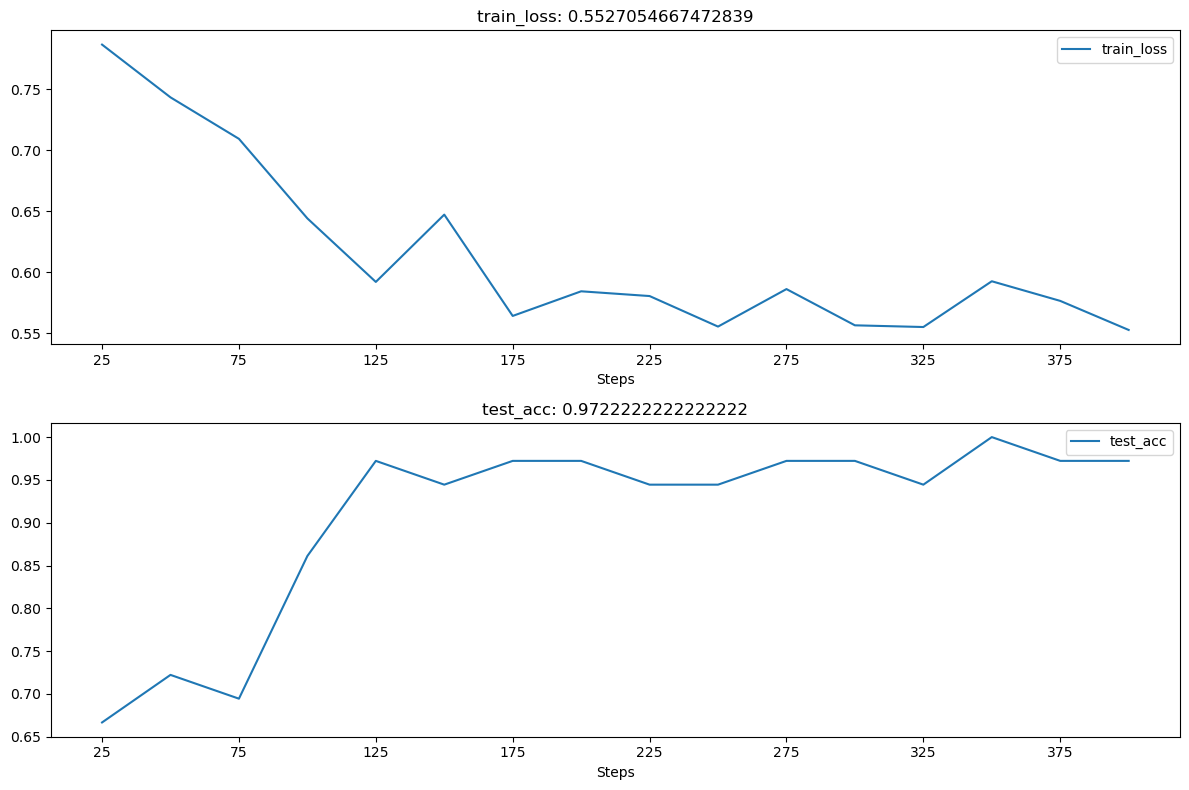

training:epoch:99,loss is:0.5527054667472839


In [62]:
#使用训练集对全连接神经网络进行训练和测试
 
#定义优化器
optimizer = torch.optim.Adam(mlpc.parameters(),lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()#交叉熵损失函数
 
#记录训练过程的指标
history1 = hl.History()
#使用canvas进行可视化
canvas1 = hl.Canvas()
print_step = 25#25次迭代后输出损失
 
#对模型进行迭代处理 所有数据训练30轮
for epoch in range(100):
    #对训练数据的加载器进行迭代计算
    for step,(b_x,b_y) in enumerate(train_data):
        #计算每个batch的损失
        _,_,output = mlpc(b_x)#MLP在训练batch的输出
        train_loss = loss_func(output,b_y)#二分类交叉熵损失
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()#使用梯度优化
        #计算迭代次数
        niter = epoch*len(train_data)+step+1
        #计算没经过print_step次迭代后的输出（25）
        if niter % print_step == 0:
            _,_,output = mlpc(X_test_nots)
            _,pre_lab = torch.max(output,1)
            test_acc = accuracy_score(y_test_t,pre_lab)
            #为history添加epoch,损失和精度
            history1.log(niter,train_loss = train_loss,test_acc = test_acc)
            #使用两个图像可视化损失函数和精度
            with canvas1:
                canvas1.draw_plot(history1["train_loss"])
                canvas1.draw_plot(history1["test_acc"])
    print("training:epoch:{},loss is:{}".format(epoch,train_loss))

In [63]:
X_test_nots[0]

tensor([41.9797,  6.5495,  9.1313, 15.3779, 20.7508])

In [67]:
y_test

8     0
46    1
2     2
31    0
15    2
37    2
12    1
23    0
38    2
17    0
35    2
29    2
45    0
50    0
7     1
38    0
29    0
9     0
36    2
4     1
43    1
21    2
42    0
1     2
48    0
19    2
16    1
49    2
6     2
19    0
24    1
32    0
50    2
3     0
13    1
11    0
Name: tag, dtype: int64

In [68]:
mlpc.eval()
predicts_data=mlpc(X_test_nots)[-1]

In [74]:
_, predicted = torch.max(predicts_data, 1)

In [78]:
predicted

tensor([0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2,
        0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0])

In [92]:
cilp_d

,0,10,5,2,1,tag
1,58.8403,10.06860,14.45370,23.27380,30.35470,0
2,55.0159,9.63567,12.97250,20.25110,26.80140,0
3,70.3137,11.82210,16.51130,26.15180,34.32900,0
4,95.5670,14.60060,19.96340,33.48200,45.80380,0
5,27.0009,5.03119,6.72519,10.60360,13.99530,0
...,...,...,...,...,...,...
48,40.0122,3.45598,4.78700,7.87086,11.51260,2
49,42.5128,5.62166,7.72393,12.20050,16.73630,2
50,23.5738,2.94973,3.97475,6.18972,8.45877,2
51,24.7708,3.14928,4.23211,6.58300,8.98934,2


In [82]:
for j,i in enumerate(predicted.detach().numpy()):
    if predicted[j]!=y_test[i]:print(i)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\1286597905.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predicted[j]!=y_test[i]:print(i)


In [77]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [98]:
x= torch.randn(7)

In [99]:
a=0.7/x

In [101]:
a.mean()

tensor(2.3724)

In [105]:
torch.std(x*a.mean()-0.7)

tensor(1.6406)

In [135]:

import numpy as np
 
x = np.random.uniform(59,60,10)

In [136]:
a = 59.5/x

In [129]:
59.5-x*a.mean()

array([-0.19278359,  0.38803406, -0.44855373, -0.38609086, -0.35629669,
        0.35601598,  0.47818672, -0.26002951, -0.05718043,  0.45682389])

In [132]:
np.std(x*a.mean()-59.5)

0.3605391719518021

In [179]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# x_data = pd.DataFrame({"x":x,"x^2":x**2,"x^3":x**3})
# y= np.random.uniform(59,59.5,10)
# model.fit(x_data)

In [187]:
y= data.iloc[1,:].transpose()
x= data.iloc[2,:].transpose()

In [188]:
x=np.array(x).transpose().reshape(-1, 1)
y=np.array(x).transpose().reshape(-1, 1)

In [189]:
model.fit(x,y)

LinearRegression()

In [190]:
y0=model.intercept_
c = model.coef_

In [191]:
model.predict(np.array(isb.iloc[3,:-1]).transpose().reshape(-1, 1))

array([[95.567 ],
       [14.6006],
       [19.9634],
       [33.482 ],
       [45.8038]])

In [193]:
import torch
from torch import nn

#创建一个全连接层
connected_layer = nn.Linear(in_features=4, out_features=1, bias=True)
#手动输入3个样本
input_data = torch.tensor(
    [
        [8, 4, 2, 1],
        [27, 9, 3, 1],
        [64, 16, 4, 1]
    ], dtype=torch.float32
)
#手动设置权重，即a,b,c,d的值
connected_layer.weight.data = torch.tensor(
    [
        [3, 5, 3.2, 7]
    ], dtype=torch.float32
)
#手动设置偏置b
connected_layer.bias.data = torch.tensor([1],dtype=torch.float32)
#获取输出结果
output = connected_layer(input_data)
print(output)


tensor([[ 58.4000],
        [143.6000],
        [292.8000]], grad_fn=<AddmmBackward0>)
